<a href="https://colab.research.google.com/github/adeliapebriani/Classification-and-Regression-Tree/blob/main/Classification_and_Reegression_Tree_3_Class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import average_precision_score

### 1. **Dataset**

In [5]:
filename = 'https://raw.githubusercontent.com/adeliapebriani/Classification-and-Regression-Tree/main/Dataset/thyroid0387.data' #load data
data = pd.read_csv(filename, names=["age","sex","on thyroxine","query on thyroxine","on antithyroid medication","sick","pregnant","thyroid surgery","I131 treatment","query hypothyroid","query hyperthyroid","lithium","goitre","tumor","hypopituitary","psych","TSH measured","TSH","T3 measured","T3","TT4 measured","TT4","T4U measured","T4U","FTI measured","FTI","TBG measured","TBG","referral source","class"])
data.head(10) #menampilkan 10 data pertama

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,class
0,29,F,f,f,f,f,f,f,f,t,f,f,f,f,f,f,t,0.3,f,?,f,?,f,?,f,?,f,?,other,-[840801013]
1,29,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.6,t,1.9,t,128,f,?,f,?,f,?,other,-[840801014]
2,41,F,f,f,f,f,f,f,f,f,t,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,t,11,other,-[840801042]
3,36,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,t,26,other,-[840803046]
4,32,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,t,36,other,S[840803047]
5,60,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,t,26,other,-[840803048]
6,77,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,t,21,other,-[840803068]
7,28,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.7,t,2.6,t,116,f,?,f,?,f,?,SVI,-[840807019]
8,28,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.2,t,1.8,t,76,f,?,f,?,f,?,other,-[840808060]
9,28,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.9,t,1.7,t,83,f,?,f,?,f,?,other,-[840808073]


### **2. preprocessing**

In [6]:
for i in range(0, len(data['class'])):
  if '-' in data['class'][i]:
    data['class'][i]= '0'
  elif 'I' in data['class'][i]:
     data['class'][i]= '0'
  elif 'J' in data['class'][i]:
     data['class'][i]= '0'
  elif 'K' in data['class'][i]:
     data['class'][i]= '0'
  elif 'L' in data['class'][i]:
     data['class'][i]= '0'
  elif 'M' in data['class'][i]:
     data['class'][i]= '0'
  elif 'N' in data['class'][i]:
     data['class'][i]= '0'
  elif 'O' in data['class'][i]:
     data['class'][i]= '0'
  elif 'P' in data['class'][i]:
     data['class'][i]= '0'
  elif 'Q' in data['class'][i]:
     data['class'][i]= '0'
  elif 'R' in data['class'][i]:
     data['class'][i]= '0'
  elif 'S' in data['class'][i]:
     data['class'][i]= '0'
  elif 'T' in data['class'][i]:
     data['class'][i]= '0'
  
    
  elif 'A' in data['class'][i]:
     data['class'][i]= '1'
  elif 'B' in data['class'][i]:
     data['class'][i]= '1'
  elif 'C' in data['class'][i]:
     data['class'][i]= '1'
  elif 'D' in data['class'][i]:
     data['class'][i]= '1'    
     
  elif 'E' in data['class'][i]:
     data['class'][i]= '2'
  elif 'F' in data['class'][i]:
     data['class'][i]= '2'
  elif 'G' in data['class'][i]:
     data['class'][i]= '2'
  elif 'H' in data['class'][i]:
     data['class'][i]= '2'
data.head(10)

print(data.info())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-p

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        9172 non-null   int64 
 1   sex                        9172 non-null   object
 2   on thyroxine               9172 non-null   object
 3   query on thyroxine         9172 non-null   object
 4   on antithyroid medication  9172 non-null   object
 5   sick                       9172 non-null   object
 6   pregnant                   9172 non-null   object
 7   thyroid surgery            9172 non-null   object
 8   I131 treatment             9172 non-null   object
 9   query hypothyroid          9172 non-null   object
 10  query hyperthyroid         9172 non-null   object
 11  lithium                    9172 non-null   object
 12  goitre                     9172 non-null   object
 13  tumor                      9172 non-null   object
 14  hypopitu

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [7]:
for col in data.columns.difference(['age']):
    print(data[col].value_counts())
    print('\n')

?       802
107     157
100     152
104     145
114     142
       ... 
208       1
268       1
4.15      1
349       1
299       1
Name: FTI, Length: 324, dtype: int64


t    8370
f     802
Name: FTI measured, dtype: int64


f    9003
t     169
Name: I131 treatment, dtype: int64


?           2604
2            452
1.8          452
1.9          408
2.1          396
            ... 
7.3            1
8.599999       1
6.5            1
1.44           1
7              1
Name: T3, Length: 86, dtype: int64


t    6568
f    2604
Name: T3 measured, dtype: int64


?        809
0.96     228
0.91     227
0.93     226
0.99     226
        ... 
0.944      1
0.37       1
0.38       1
2          1
2.02       1
Name: T4U, Length: 177, dtype: int64


t    8363
f     809
Name: T4U measured, dtype: int64


?           8823
24            23
27            22
20            20
23            19
            ... 
46             1
0.15           1
100            1
48             1
9.599999       1
Name: TBG, Leng

In [8]:
print("Jumlah kemunculan nilai pada atribut sex: \n", data['sex'].value_counts())
data['sex'] = data['sex'].replace('F', 0)
data['sex'] = data['sex'].replace('M', 1)
data['sex'] = data['sex'].replace('?', 0)
print("Jumlah kemunculan nilai pada atribut sex setelah penghilangan nilai null: \n", data['sex'].value_counts())

Jumlah kemunculan nilai pada atribut sex: 
 F    6073
M    2792
?     307
Name: sex, dtype: int64
Jumlah kemunculan nilai pada atribut sex setelah penghilangan nilai null: 
 0    6380
1    2792
Name: sex, dtype: int64


In [9]:
data = data.replace('?', np.nan)

In [10]:
data.isnull().sum() #menampilkan jumlah nilai null dari tiap atribut

age                             0
sex                             0
on thyroxine                    0
query on thyroxine              0
on antithyroid medication       0
sick                            0
pregnant                        0
thyroid surgery                 0
I131 treatment                  0
query hypothyroid               0
query hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH measured                    0
TSH                           842
T3 measured                     0
T3                           2604
TT4 measured                    0
TT4                           442
T4U measured                    0
T4U                           809
FTI measured                    0
FTI                           802
TBG measured                    0
TBG                          8823
referral source                 0
class         

In [11]:
print("Jumlah kemunculan nilai pada atribut on thyroxine: \n", data['on thyroxine'].value_counts())
data['on thyroxine'] = data['on thyroxine'].replace('f', 0)
data['on thyroxine'] = data['on thyroxine'].replace('t', 1)
print("\n")
print("Jumlah kemunculan nilai pada atribut query on thyroxine: \n", data['query on thyroxine'].value_counts())
data['query on thyroxine'] = data['query on thyroxine'].replace('f', 0)
data['query on thyroxine'] = data['query on thyroxine'].replace('t', 1)
print("\n")
print("Jumlah kemunculan nilai pada atribut on antithyroid medication: \n", data['on antithyroid medication'].value_counts())
data['on antithyroid medication'] = data['on antithyroid medication'].replace('f', 0)
data['on antithyroid medication'] = data['on antithyroid medication'].replace('t', 1)
print("\n")
print("Jumlah kemunculan nilai pada atribut sick: \n", data['sick'].value_counts())
data['sick'] = data['sick'].replace('f', 0)
data['sick'] = data['sick'].replace('t', 1)
print("\n")
print("Jumlah kemunculan nilai pada atribut pregnant: \n", data['pregnant'].value_counts())
data['pregnant'] = data['pregnant'].replace('f', 0)
data['pregnant'] = data['pregnant'].replace('t', 1)
print("\n")
print("Jumlah kemunculan nilai pada atribut thyroid surgery: \n", data['thyroid surgery'].value_counts())
data['thyroid surgery'] = data['thyroid surgery'].replace('f', 0)
data['thyroid surgery'] = data['thyroid surgery'].replace('t', 1)
print("\n")
print("Jumlah kemunculan nilai pada atribut I131 treatment: \n", data['I131 treatment'].value_counts())
data['I131 treatment'] = data['I131 treatment'].replace('f', 0)
data['I131 treatment'] = data['I131 treatment'].replace('t', 1)
print("\n")
print("Jumlah kemunculan nilai pada atribut query hypothyroid: \n", data['query hypothyroid'].value_counts())
data['query hypothyroid'] = data['query hypothyroid'].replace('f', 0)
data['query hypothyroid'] = data['query hypothyroid'].replace('t', 1)
print("\n")
print("Jumlah kemunculan nilai pada atribut query hyperthyroid: \n", data['query hyperthyroid'].value_counts())
data['query hyperthyroid'] = data['query hyperthyroid'].replace('f', 0)
data['query hyperthyroid'] = data['query hyperthyroid'].replace('t', 1)
print("\n")
print("Jumlah kemunculan nilai pada atribut lithium: \n", data['lithium'].value_counts())
data['lithium'] = data['lithium'].replace('f', 0)
data['lithium'] = data['lithium'].replace('t', 1)
print("\n")
print("Jumlah kemunculan nilai pada atribut goitre: \n", data['goitre'].value_counts())
data['goitre'] = data['goitre'].replace('f', 0)
data['goitre'] = data['goitre'].replace('t', 1)
print("\n")
print("Jumlah kemunculan nilai pada atribut tumor: \n", data['tumor'].value_counts())
data['tumor'] = data['tumor'].replace('f', 0)
data['tumor'] = data['tumor'].replace('t', 1)
print("\n")
print("Jumlah kemunculan nilai pada atribut hypopituitary: \n", data['hypopituitary'].value_counts())
data['hypopituitary'] = data['hypopituitary'].replace('f', 0)
data['hypopituitary'] = data['hypopituitary'].replace('t', 1)
print("\n")
print("Jumlah kemunculan nilai pada atribut psych: \n", data['psych'].value_counts())
data['psych'] = data['psych'].replace('f', 0)
data['psych'] = data['psych'].replace('t', 1)

Jumlah kemunculan nilai pada atribut on thyroxine: 
 f    7932
t    1240
Name: on thyroxine, dtype: int64


Jumlah kemunculan nilai pada atribut query on thyroxine: 
 f    9019
t     153
Name: query on thyroxine, dtype: int64


Jumlah kemunculan nilai pada atribut on antithyroid medication: 
 f    9056
t     116
Name: on antithyroid medication, dtype: int64


Jumlah kemunculan nilai pada atribut sick: 
 f    8828
t     344
Name: sick, dtype: int64


Jumlah kemunculan nilai pada atribut pregnant: 
 f    9065
t     107
Name: pregnant, dtype: int64


Jumlah kemunculan nilai pada atribut thyroid surgery: 
 f    9038
t     134
Name: thyroid surgery, dtype: int64


Jumlah kemunculan nilai pada atribut I131 treatment: 
 f    9003
t     169
Name: I131 treatment, dtype: int64


Jumlah kemunculan nilai pada atribut query hypothyroid: 
 f    8542
t     630
Name: query hypothyroid, dtype: int64


Jumlah kemunculan nilai pada atribut query hyperthyroid: 
 f    8521
t     651
Name: query hyperthyroi

In [12]:
data.isnull().sum()

age                             0
sex                             0
on thyroxine                    0
query on thyroxine              0
on antithyroid medication       0
sick                            0
pregnant                        0
thyroid surgery                 0
I131 treatment                  0
query hypothyroid               0
query hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH measured                    0
TSH                           842
T3 measured                     0
T3                           2604
TT4 measured                    0
TT4                           442
T4U measured                    0
T4U                           809
FTI measured                    0
FTI                           802
TBG measured                    0
TBG                          8823
referral source                 0
class         

In [13]:
data.drop('TBG', inplace=True, axis=1)


In [14]:
data.drop('TBG measured', inplace=True, axis=1)
data.drop('T4U measured', inplace=True, axis=1)
data.drop('TSH measured', inplace=True, axis=1)
data.drop('FTI measured', inplace=True, axis=1)
data.drop('T3 measured', inplace=True, axis=1)
data.drop('TT4 measured', inplace=True, axis=1)
data.drop('referral source', inplace=True, axis=1)

In [15]:
data.head(10)


,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,class
0,29,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.3,NaN,NaN,NaN,NaN,0
1,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.6,1.9,128,NaN,NaN,0
2,41,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0
3,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0
4,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0
5,60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0
6,77,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0
7,28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.7,2.6,116,NaN,NaN,0
8,28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.2,1.8,76,NaN,NaN,0
9,28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.9,1.7,83,NaN,NaN,0


In [16]:
column = ['age','TSH', 'T3', 'TT4', 'T4U', 'FTI']
for i in range(0, len(column)):
  data[column[i]] = data[column[i]].astype(float)

In [17]:
mean = data["age"].mean()
data["age"] = data["age"].replace(np.nan, mean)

mean = data["TSH"].mean()
data["TSH"] = data["TSH"].replace(np.nan, mean)


mean = data["T3"].mean()
data["T3"] = data["T3"].replace(np.nan, mean)
data

mean = data["TT4"].mean()
data["TT4"] = data["TT4"].replace(np.nan, mean)

mean = data["T4U"].mean()
data["T4U"] = data["T4U"].replace(np.nan, mean)

mean = data["FTI"].mean()
data["FTI"] = data["FTI"].replace(np.nan, mean)

data

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,class
0,29.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.300000,1.970629,108.700305,0.976056,113.640746,0
1,29.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.600000,1.900000,128.000000,0.976056,113.640746,0
2,41.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,5.218403,1.970629,108.700305,0.976056,113.640746,0
3,36.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.218403,1.970629,108.700305,0.976056,113.640746,0
4,32.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.218403,1.970629,108.700305,0.976056,113.640746,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,56.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,5.218403,1.970629,64.000000,0.830000,77.000000,0
9168,22.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.218403,1.970629,91.000000,0.920000,99.000000,0
9169,69.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.218403,1.970629,113.000000,1.270000,89.000000,0
9170,47.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.218403,1.970629,75.000000,0.850000,88.000000,0


In [18]:
data.isnull().sum()

age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH                          0
T3                           0
TT4                          0
T4U                          0
FTI                          0
class                        0
dtype: int64

In [19]:
data.to_csv("Dataclean.csv")
data.to_csv("Dataclean.data")

### 3. **CART** DENGAN GINI INDEX

In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
X=data.iloc[:,0:21].values
#Label Set
y=data.iloc[:,21].values

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)


model=DecisionTreeClassifier(criterion='gini', splitter='best', random_state=100)
'''model=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=10, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=100, splitter='random')'''

model.fit(X_train,y_train)

y_trained = model.predict(X_train)
accuracy_score_train = accuracy_score(y_trained, y_train)
print("Akurasi Score Data Train: ", accuracy_score_train)

y_tested = model.predict(X_test)
accuracy_score_tested = accuracy_score(y_test, y_tested)
print("Akurasi Score Data Test: ", accuracy_score_tested)

conf_mat = confusion_matrix(y_test, y_tested)
print("Confusion Matrix: \n", conf_mat)

from sklearn.metrics import classification_report
print (classification_report(y_test, y_tested))


print("Mean cross validation score for training set: ",np.mean(cross_val_score(model,X_train,y_train,cv=5))*100)
print("Mean cross validation score for testing set: ",np.mean(cross_val_score(model,X_test,y_test,cv=5))*100)

Akurasi Score Data Train:  1.0
Akurasi Score Data Test:  0.9803814713896458
Confusion Matrix: 
 [[1654   16    5]
 [  11   26    0]
 [   4    0  119]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1675
           1       0.62      0.70      0.66        37
           2       0.96      0.97      0.96       123

    accuracy                           0.98      1835
   macro avg       0.86      0.89      0.87      1835
weighted avg       0.98      0.98      0.98      1835

Mean cross validation score for training set:  97.96923785589972
Mean cross validation score for testing set:  96.62125340599455


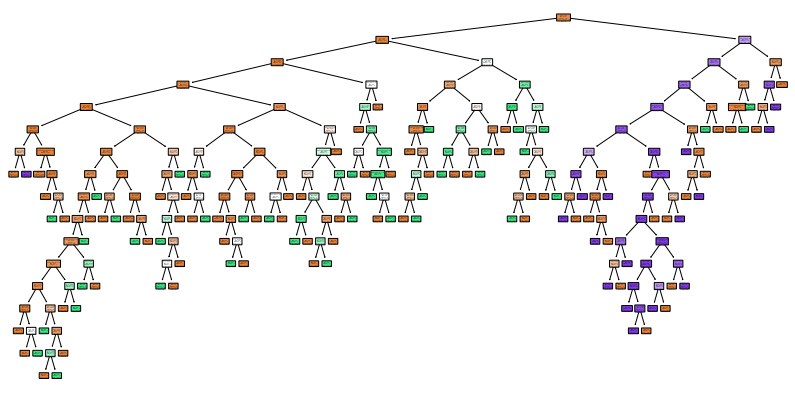

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import cross_val_score,GridSearchCV

plt.figure(figsize=(14,7))
_ = plot_tree(model,filled=True,rounded=True,class_names=['N','HR','HP'],feature_names=data.columns)

In [22]:
'''from IPython.display import Image  
from sklearn import tree
import matplotlib.image as mpimg
import pydotplus
import io
import matplotlib.pyplot as plt

import sys

rt = model.fit(X_train, y_train)

str1 = "/usr/local/Cellar/graphviz/2.40.1_1/bin/"
sys.path.append(str1)

dot_data = io.StringIO()
tree.export_graphviz(rt, out_file=dot_data, filled=True, class_names = '01')

# Draw graph
pydotplus.graph_from_dot_data(dot_data.getvalue()).write_png('dt.png')

plt.figure(figsize=(100, 100))
img = mpimg.imread('dt.png')
imgplot = plt.imshow(img)

plt.show()'''

'from IPython.display import Image  \nfrom sklearn import tree\nimport matplotlib.image as mpimg\nimport pydotplus\nimport io\nimport matplotlib.pyplot as plt\n\nimport sys\n\nrt = model.fit(X_train, y_train)\n\nstr1 = "/usr/local/Cellar/graphviz/2.40.1_1/bin/"\nsys.path.append(str1)\n\ndot_data = io.StringIO()\ntree.export_graphviz(rt, out_file=dot_data, filled=True, class_names = \'01\')\n\n# Draw graph\npydotplus.graph_from_dot_data(dot_data.getvalue()).write_png(\'dt.png\')\n\nplt.figure(figsize=(100, 100))\nimg = mpimg.imread(\'dt.png\')\nimgplot = plt.imshow(img)\n\nplt.show()'

### **4. TREE PRUNING**

In [23]:
path = model.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas = path.ccp_alphas
impurities = path.impurities

print(ccp_alphas)

[0.00000000e+00 9.02992885e-05 9.08479902e-05 9.08636591e-05
 1.06633875e-04 1.21151545e-04 1.27777021e-04 1.28278107e-04
 1.32800733e-04 1.33050358e-04 1.35300631e-04 1.35500763e-04
 1.36248519e-04 1.42785750e-04 1.63554586e-04 1.81727318e-04
 1.81727318e-04 1.81727318e-04 1.81727318e-04 1.81727318e-04
 1.86919527e-04 2.04443233e-04 2.04443233e-04 2.06508316e-04
 2.13879074e-04 2.23028981e-04 2.25488860e-04 2.26460196e-04
 2.38517105e-04 2.47809979e-04 2.52321392e-04 2.54418245e-04
 2.54418245e-04 2.54905015e-04 2.62106709e-04 2.68020181e-04
 2.92808722e-04 3.29059575e-04 3.79149268e-04 3.90118478e-04
 4.32094676e-04 4.36145564e-04 4.49775112e-04 4.57959363e-04
 4.67394376e-04 4.88539673e-04 4.90323324e-04 5.02778914e-04
 5.06663664e-04 5.11108082e-04 6.77862178e-04 6.85710222e-04
 6.95106992e-04 7.00948227e-04 7.18921259e-04 7.69514314e-04
 7.71020454e-04 1.00142041e-03 1.52101576e-03 1.53689389e-03
 2.35225746e-03 2.58070633e-03 3.47145193e-03 3.92700824e-03
 4.34059069e-03 8.044894

In [24]:
tree_list = []

for alpha in ccp_alphas:
    tree = DecisionTreeClassifier(random_state=100,ccp_alpha=alpha)
    tree.fit(X_train,y_train)
    tree_list.append(tree)

    
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.07475739064498226


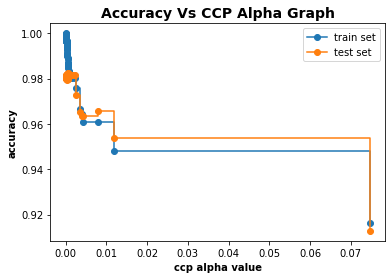

In [25]:
training_score = [tree.score(X_train,y_train) for tree in tree_list]
testing_score = [tree.score(X_test,y_test) for tree in tree_list]

fig,ax = plt.subplots()
ax.set_xlabel("ccp alpha value",fontweight='bold')
ax.set_ylabel("accuracy",fontweight='bold')
ax.set_title("Accuracy Vs CCP Alpha Graph",fontsize=14,fontweight='bold')
ax.plot(ccp_alphas,training_score,label='train set',marker='o',drawstyle='steps-post')
ax.plot(ccp_alphas,testing_score,label='test set',marker='o',drawstyle='steps-post')
ax.legend()
plt.show()

In [26]:
model_list = pd.DataFrame({'alpha':ccp_alphas,'train score':training_score,'test score':testing_score})
model_list['score diff'] = model_list['train score'] - model_list['test score']

In [27]:
model_list.head()

,alpha,train score,test score,score diff
0,0.000000,1.000000,0.980381,0.019619
1,0.000090,0.999864,0.980381,0.019482
2,0.000091,0.999727,0.980381,0.019346
3,0.000091,0.999591,0.980381,0.019210
4,0.000107,0.999319,0.980381,0.018937


In [28]:
model_list[model_list['score diff']==model_list['score diff'].min()]

,alpha,train score,test score,score diff
66,0.011908,0.947935,0.953678,-0.005743


In [29]:
model_list[model_list['test score']==model_list['test score'].max()]

,alpha,train score,test score,score diff
43,0.000458,0.989233,0.982561,0.006671
44,0.000467,0.988687,0.982561,0.006126


In [30]:
model_pruned=DecisionTreeClassifier(criterion='gini', ccp_alpha=0.000467, splitter='best')
'''model=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=10, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=100, splitter='random')'''

model_pruned.fit(X_train,y_train)
  
y_trained = model_pruned.predict(X_train)
accuracy_score_train = accuracy_score(y_train, y_trained)
print("Akurasi Score Data Train: ", accuracy_score_train)

conf_mat = confusion_matrix(y_train, y_trained)
print("Confusion Matrix test: \n", conf_mat)
print("\n")

y_tested = model_pruned.predict(X_test)
accuracy_score_tested = accuracy_score(y_test, y_tested)
print("Akurasi Score Data Test: ", accuracy_score_tested)

conf_mat = confusion_matrix(y_test, y_tested)
print("Confusion Matrix test: \n", conf_mat)
print("\n")

from sklearn.metrics import classification_report
print (classification_report(y_test, y_tested))

print("Mean cross validation score for training set: ",np.mean(cross_val_score(model_pruned,X_train,y_train,cv=5))*100)
print("Mean cross validation score for testing set: ",np.mean(cross_val_score(model_pruned,X_test,y_test,cv=5))*100)

Akurasi Score Data Train:  0.9892326563990732
Confusion Matrix test: 
 [[6692   21    9]
 [  40  105    0]
 [   9    0  461]]


Akurasi Score Data Test:  0.9825613079019073
Confusion Matrix test: 
 [[1661   10    4]
 [  14   23    0]
 [   4    0  119]]


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1675
           1       0.70      0.62      0.66        37
           2       0.97      0.97      0.97       123

    accuracy                           0.98      1835
   macro avg       0.88      0.86      0.87      1835
weighted avg       0.98      0.98      0.98      1835

Mean cross validation score for training set:  98.14630313769413
Mean cross validation score for testing set:  96.566757493188


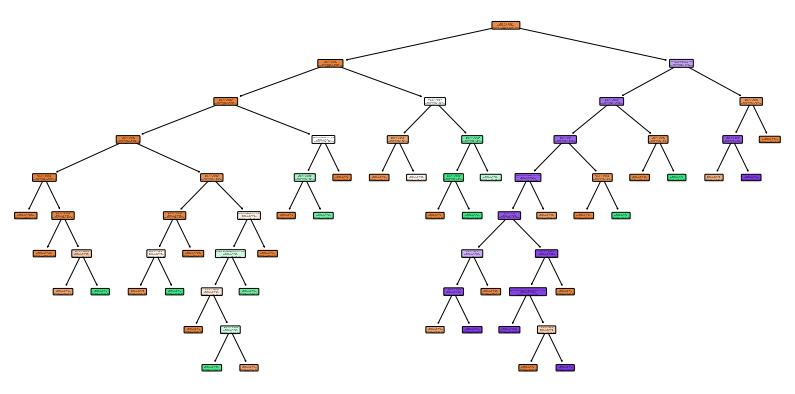

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import cross_val_score,GridSearchCV

plt.figure(figsize=(14,7))
_ = plot_tree(model_pruned,filled=True,rounded=True,class_names=['N','HR','HP'],feature_names=data.columns)